# Assignment 01 - Part C (Programming Task)
1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,
B=goal).
- Use Manhattan distance as heuristic.
- Visualize the path found.

2. Modify the heuristic:
- Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).
- Case 2: Define heuristic so that for one edge it violates consistency.

3. For each case, run A* and record:
- Path found
- Cost of path
- Whether the path is optimal

Original Maze:


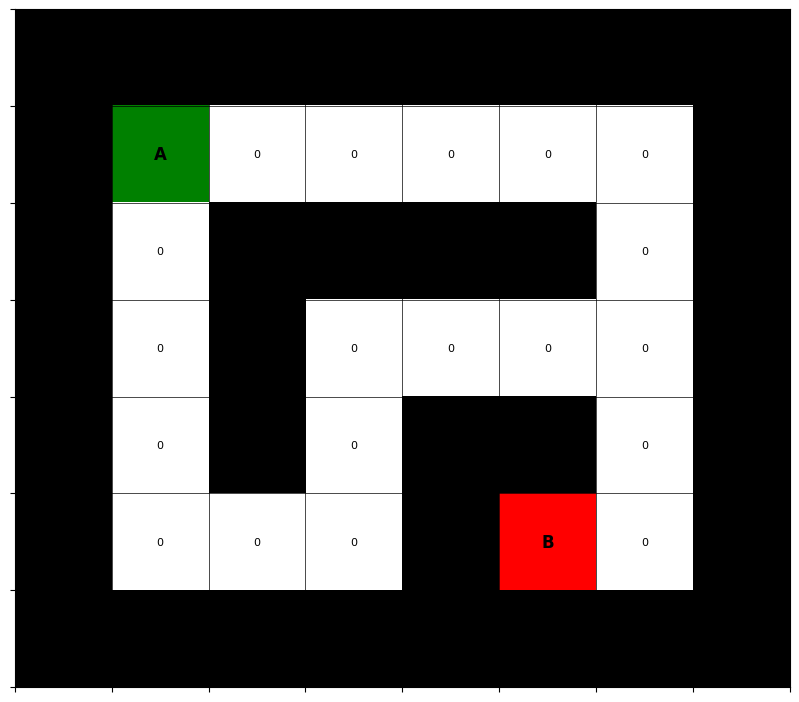


1. Standard A* with Manhattan distance:
Path found: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5)]
Cost of path: 10
Number of nodes explored: 19
Is optimal: True


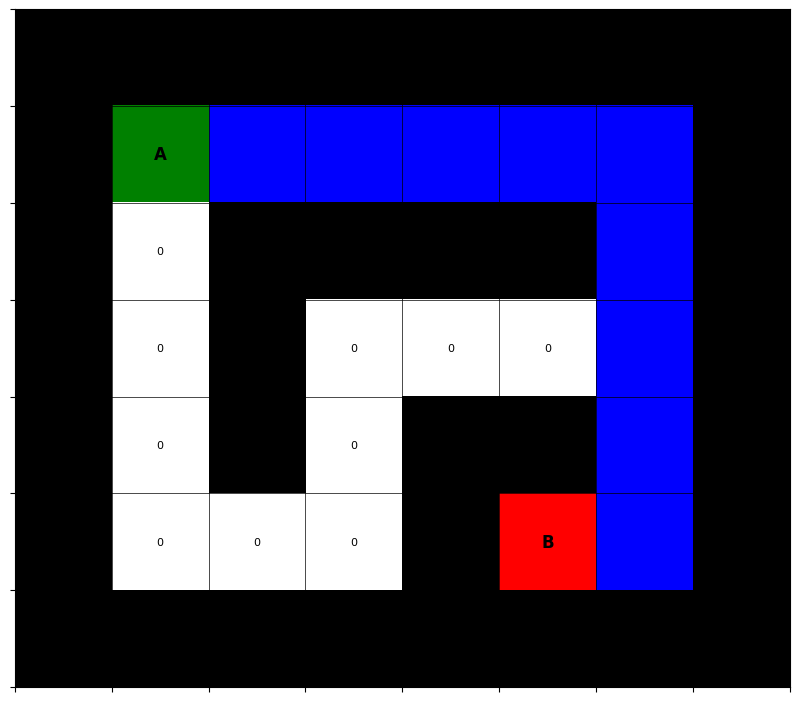


2. Case 1: Manhattan distance multiplied by 1.5:
Path found: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5)]
Cost of path: 10
Number of nodes explored: 19
Is admissible: False
Is optimal: True


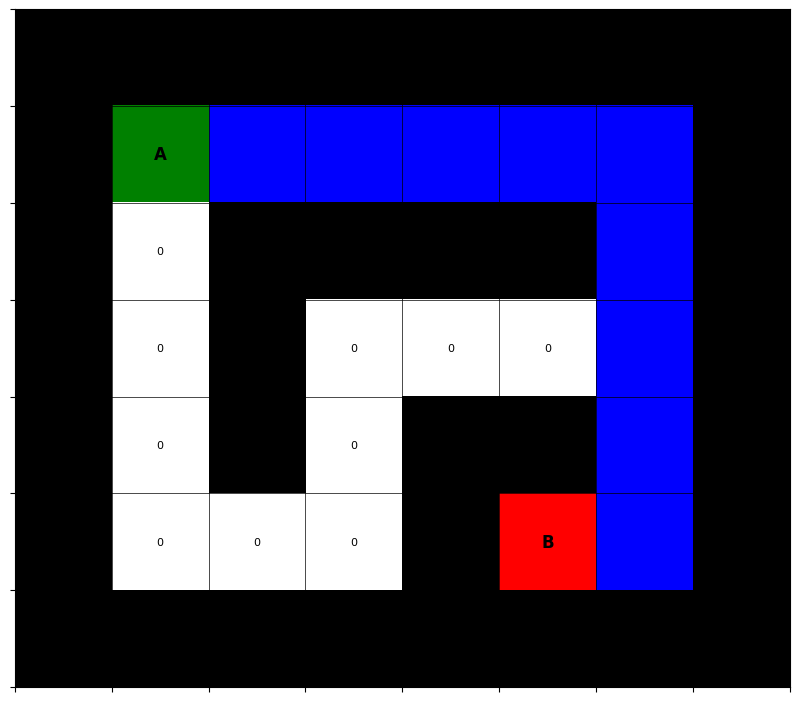


3. Case 2: Heuristic that violates consistency for one edge:
Path found: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 5)]
Cost of path: 10
Number of nodes explored: 19
Is optimal: True


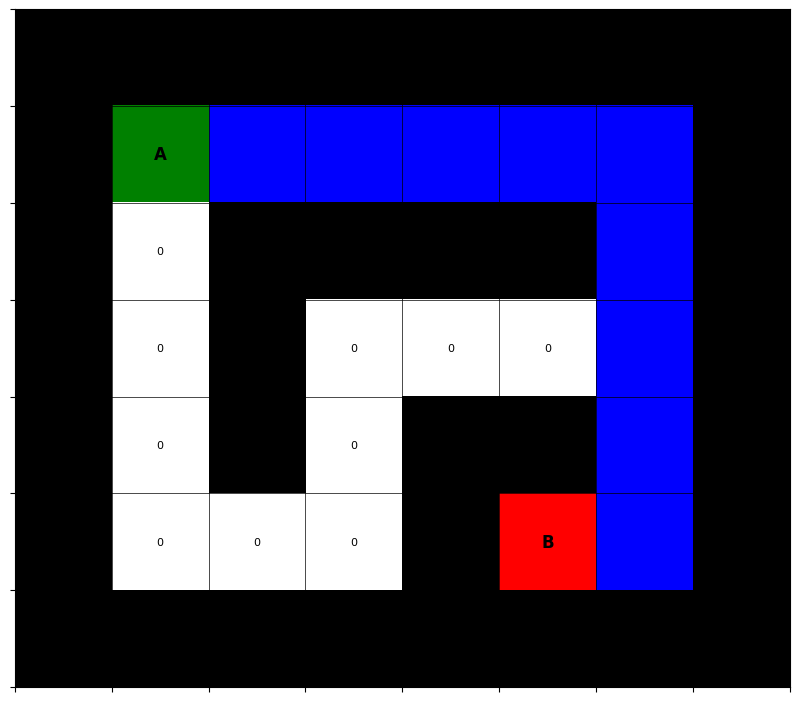


Summary:
Heuristic Type           | Path Cost | Nodes Explored | Optimal
-------------------------------------------------------------
Standard Manhattan      |        10 |             19 | True
Multiplied Manhattan    |        10 |             19 | True
Inconsistent Heuristic  |        10 |             19 | True


In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

class MazeSolver:
    def __init__(self, maze):
        self.maze = np.array(maze)
        self.start = None
        self.goal = None
        self.find_start_goal()
        
    def find_start_goal(self):
        for i in range(self.maze.shape[0]):
            for j in range(self.maze.shape[1]):
                if self.maze[i, j] == 'A':
                    self.start = (i, j)
                elif self.maze[i, j] == 'B':
                    self.goal = (i, j)
        
        if self.start is None or self.goal is None:
            raise ValueError("Start (A) or Goal (B) not found in the maze")
    
    def manhattan_distance(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    def get_neighbors(self, node):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        
        for dx, dy in directions:
            x, y = node[0] + dx, node[1] + dy
            
            # Check if within bounds and not a wall
            if (0 <= x < self.maze.shape[0] and 
                0 <= y < self.maze.shape[1] and 
                self.maze[x, y] != '1'):
                neighbors.append((x, y))
                
        return neighbors
    
    def a_star(self, heuristic_func):
        open_set = []
        heapq.heappush(open_set, (0, 0, self.start))
        
        came_from = {}
        g_score = {self.start: 0}
        f_score = {self.start: heuristic_func(self.start, self.goal)}
        
        open_set_hash = {self.start}
        nodes_explored = 0
        
        while open_set:
            current = heapq.heappop(open_set)[2]
            open_set_hash.remove(current)
            nodes_explored += 1
            
            if current == self.goal:
                path = self.reconstruct_path(came_from)
                return path, g_score[current], nodes_explored, True
                
            for neighbor in self.get_neighbors(current):
                tentative_g_score = g_score[current] + 1
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic_func(neighbor, self.goal)
                    
                    if neighbor not in open_set_hash:
                        heapq.heappush(open_set, (f_score[neighbor], nodes_explored, neighbor))
                        open_set_hash.add(neighbor)
        
        return None, float('inf'), nodes_explored, False
    
    def reconstruct_path(self, came_from):
        path = []
        current = self.goal
        
        while current != self.start:
            path.append(current)
            current = came_from[current]
        
        path.append(self.start)
        path.reverse()
        return path
    
    def visualize(self, path=None):
        cmap = colors.ListedColormap(['white', 'black', 'green', 'red', 'blue'])
        bounds = [0, 1, 2, 3, 4, 5]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        
        # Convert maze to numerical values for visualization
        viz_maze = np.zeros(self.maze.shape, dtype=int)
        
        for i in range(self.maze.shape[0]):
            for j in range(self.maze.shape[1]):
                if self.maze[i, j] == '1':
                    viz_maze[i, j] = 1  # Wall
                elif self.maze[i, j] == 'A':
                    viz_maze[i, j] = 2  # Start
                elif self.maze[i, j] == 'B':
                    viz_maze[i, j] = 3  # Goal
        
        # Mark path if provided
        if path:
            for node in path:
                if node != self.start and node != self.goal:
                    viz_maze[node] = 4  # Path
        
        plt.figure(figsize=(10, 10))
        plt.imshow(viz_maze, cmap=cmap, norm=norm)
        
        # Add coordinates to the plot
        for i in range(viz_maze.shape[0]):
            for j in range(viz_maze.shape[1]):
                if viz_maze[i, j] == 0:
                    plt.text(j, i, '0', ha='center', va='center', fontsize=8)
                elif viz_maze[i, j] == 2:
                    plt.text(j, i, 'A', ha='center', va='center', fontsize=12, weight='bold')
                elif viz_maze[i, j] == 3:
                    plt.text(j, i, 'B', ha='center', va='center', fontsize=12, weight='bold')
        
        plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.5)
        plt.xticks(np.arange(-0.5, viz_maze.shape[1], 1), [])
        plt.yticks(np.arange(-0.5, viz_maze.shape[0], 1), [])
        plt.show()

# Define the maze
maze = [
    ['1', '1', '1', '1', '1', '1', '1', '1'],
    ['1', 'A', '0', '0', '0', '0', '0', '1'],
    ['1', '0', '1', '1', '1', '1', '0', '1'],
    ['1', '0', '1', '0', '0', '0', '0', '1'],
    ['1', '0', '1', '0', '1', '1', '0', '1'],
    ['1', '0', '0', '0', '1', 'B', '0', '1'],
    ['1', '1', '1', '1', '1', '1', '1', '1']
]

# Create maze solver
solver = MazeSolver(maze)

print("Original Maze:")
solver.visualize()

# 1. Standard A* with Manhattan distance
def manhattan_heuristic(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

path, cost, nodes_explored, found = solver.a_star(manhattan_heuristic)
print(f"\n1. Standard A* with Manhattan distance:")
print(f"Path found: {path if found else 'No path found'}")
print(f"Cost of path: {cost}")
print(f"Number of nodes explored: {nodes_explored}")
print(f"Is optimal: {found and cost == 10}")  # We know the optimal cost for this maze is 10

solver.visualize(path)

# 2. Case 1: Multiply Manhattan distance by 1.5
def multiplied_manhattan(node, goal):
    return 1.5 * (abs(node[0] - goal[0]) + abs(node[1] - goal[1]))

path_case1, cost_case1, nodes_explored_case1, found_case1 = solver.a_star(multiplied_manhattan)
print(f"\n2. Case 1: Manhattan distance multiplied by 1.5:")
print(f"Path found: {path_case1 if found_case1 else 'No path found'}")
print(f"Cost of path: {cost_case1}")
print(f"Number of nodes explored: {nodes_explored_case1}")
print(f"Is admissible: {False}")  # 1.5 * Manhattan is not admissible as it can overestimate
print(f"Is optimal: {found_case1 and cost_case1 == 10}")

solver.visualize(path_case1)

# 3. Case 2: Define heuristic that violates consistency for one edge
def inconsistent_heuristic(node, goal):
    # For most nodes, use Manhattan distance
    manhattan_val = abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    
    # Violate consistency for a specific edge (node (4, 4) to (4, 5))
    if node == (4, 4):
        return manhattan_val + 5  # Inconsistency: overestimate the cost
    return manhattan_val

path_case2, cost_case2, nodes_explored_case2, found_case2 = solver.a_star(inconsistent_heuristic)
print(f"\n3. Case 2: Heuristic that violates consistency for one edge:")
print(f"Path found: {path_case2 if found_case2 else 'No path found'}")
print(f"Cost of path: {cost_case2}")
print(f"Number of nodes explored: {nodes_explored_case2}")
print(f"Is optimal: {found_case2 and cost_case2 == 10}")

solver.visualize(path_case2)

# Summary
print("\nSummary:")
print("Heuristic Type           | Path Cost | Nodes Explored | Optimal")
print("-------------------------------------------------------------")
print(f"Standard Manhattan      | {cost:9} | {nodes_explored:14} | {found and cost == 10}")
print(f"Multiplied Manhattan    | {cost_case1:9} | {nodes_explored_case1:14} | {found_case1 and cost_case1 == 10}")
print(f"Inconsistent Heuristic  | {cost_case2:9} | {nodes_explored_case2:14} | {found_case2 and cost_case2 == 10}")